## Veri Setinin Boyutunu Artırma (Dataset Augmentation)

**Elimizde ne kadar fazla sayıda veri olursa model o kadar iyi öğrenecektir; bu bilinen bir gerçek.**  İyi öğrenme beraberinde yüksek başarımı da getirecektir. Verinin fazla olması model başarımı artımının yanı sıra ezberlemeyi (overfitting) de önleyecektir. Verinin boyutunun az olduğu durumlarda veri setini artırmak için kullanılan yöntemler arasında ilk sırada sentetik veri üretilmesi gelmektedir.

#### Sentetik Veri Üretmek 

Sentetik veri üretmek veya veri setinin boyutunu artırmak için herkesin üzerinde hem fikir olduğu genel geçer bir yöntem yok. Bununla birlikte bu konuda takip edilen genel bir prensip var;

**“Ellimizdeki veri seti problemin gerçek dünyadaki karmaşıklığını olabildiğince yansıtsın.”**

Verisetini bu prensibe ne kadar uydurabilirsek, başarım da o oranda artacaktır. Bu anlamda verinin farklı versiyonlarının verisetinde bulunması, verisetinin prensibe uygunluğunu artıracaktır. Bu nedenle verinin farklı varyasyonlarını, farklı boyuttaki görünümleri verisetine dahil edilerek verisetinin boyutu başarımı artıracak şekilde büyütülür. Sentetik veri üretme özellikle resim ve ses tanıma problemlerinde sıkça kullanılmakta ve  **başarımı arttırdığı bilinmektedir.**  Resmi çevirme, yeniden boyutlandırma, belli bir kısmını alma, resmi rastgele kesme, resme gürültü (Gaussian noise vb.) ekleme vb. gibi sentetik veri üretme teknikleri sıkça kullanılmaktadır.

<img src="https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png" width="800" height="440" />

Sentetik veri ile veri setinin boyutunun artırılması belli oranda overfitting’i önlese bile, genelde yetersiz kalmaktadır. Çünkü **oluşturulan sentetik veriler, belli miktarda farklılaşma olsa bile mevcut veri seti ile korelasyonunu korumaya devam edecektir.** Bu nedenle ```veri seti artırma yöntemi genelde diğer regülasyon yöntemleri ile birlikte kullanılmaktadır.```

In [30]:
# Gerekli Kütüphaneler
from keras.preprocessing.image import ImageDataGenerator , img_to_array , array_to_img , load_img
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [43]:
# Veri Setini Yükleme ve Ön İşlem Gerçekleştirme

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

### Orjinal Resimler

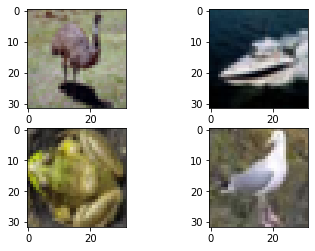

In [44]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
    for i in range(0, 4): 
        pyplot.subplot(220 + 1 + i) 
        pyplot.imshow(X_batch[i])
    pyplot.show() 
    break

### Açısal Değer Vererek Döndürme

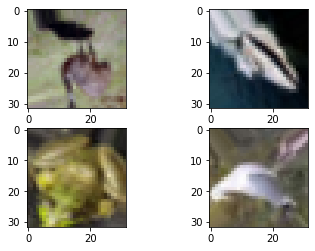

In [56]:
datagen = ImageDataGenerator(rotation_range=180)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
    for i in range(0, 4): 
        pyplot.subplot(220 + 1 + i) 
        pyplot.imshow(X_batch[i])
    pyplot.show() 
    break

### Dikey Düzlemde Kaydırma

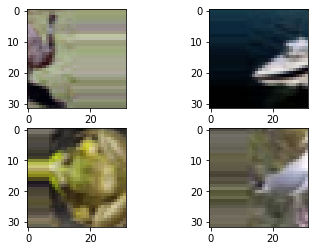

In [46]:
datagen = ImageDataGenerator(width_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
    for i in range(0, 4): 
        pyplot.subplot(220 + 1 + i) 
        pyplot.imshow(X_batch[i])
    pyplot.show() 
    break

### Dikey Düzlemde Kaydırma

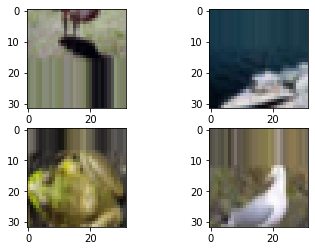

In [55]:
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
    for i in range(0, 4): 
        pyplot.subplot(220 + 1 + i) 
        pyplot.imshow(X_batch[i])
    pyplot.show() 
    break

### Yakınlaştırma

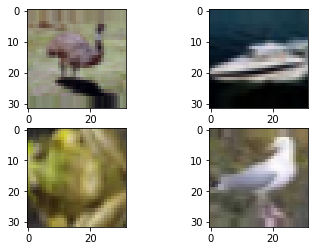

In [53]:
datagen = ImageDataGenerator(zoom_range = 0.3)
datagen.fit(X_train)

for X_batch , y_batch in datagen.flow(X_train,  y_train , batch_size = 4 , seed = 499):
  for i in range(0,4):
    pyplot.subplot(220 + 1 + i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

### Yatay ve Dikey Simetriğini Alma

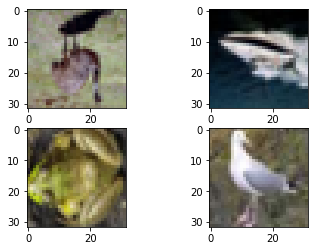

In [54]:
datagen = ImageDataGenerator(vertical_flip=True,
                             horizontal_flip=True)
datagen.fit(X_train)

for X_batch , y_batch in datagen.flow(X_train , y_train , batch_size = 4  ,seed = 499):
  for i in range(0,4):
    pyplot.subplot(220 + 1 + i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break